<a href="https://colab.research.google.com/github/MahsaDorri/DeepLearning/blob/main/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مشکل بیش‌برازش داده‌ها یا Overfitting و معرفی Dropout</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شبکه بدون Dropout</div>



In [1]:
!wget https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat -P dataset

--2024-11-26 19:34:30--  https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat [following]
--2024-11-26 19:34:31--  https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3989009 (3.8M) [application/octet-stream]
Saving to: ‘dataset/Data_hoda_full.mat’

Data_hoda_full.mat  100%[===================>]   3.80M  --.-KB/s    in 0.1s    

2024-11

In [3]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset.py

--2024-11-26 19:35:03--  https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     917  --.-KB/s    in 0s      

2024-11-26 19:35:04 (42.4 MB/s) - ‘dataset.py’ saved [917/917]



In [4]:
# 1. Import libraries and modules
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train, y_train_original, x_test, y_test_original = load_hoda()

# 3. Preprocess input data
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(60, activation='relu', input_dim=25))
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
          epochs=150,
          batch_size=128, validation_data=(x_test, y_test))


Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2311 - loss: 2.2279 - val_accuracy: 0.4700 - val_loss: 2.0430
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5918 - loss: 1.9428 - val_accuracy: 0.6750 - val_loss: 1.7652
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7032 - loss: 1.6546 - val_accuracy: 0.7600 - val_loss: 1.4399
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7947 - loss: 1.2889 - val_accuracy: 0.8100 - val_loss: 1.1152
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8303 - loss: 0.9699 - val_accuracy: 0.8550 - val_loss: 0.8522
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8628 - loss: 0.7209 - val_accuracy: 0.8650 - val_loss: 0.6724
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8605 - loss: 0.6026 - val_accuracy: 0.8700 - val_loss: 0.5584
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8688 - loss: 0.4870 - val_accuracy: 0.8650 - val_loss: 0.4792
Epoch 

Test Accuracy: 0.9300000071525574 
Maximum Test Acuracy During Training:  0.9399999976158142


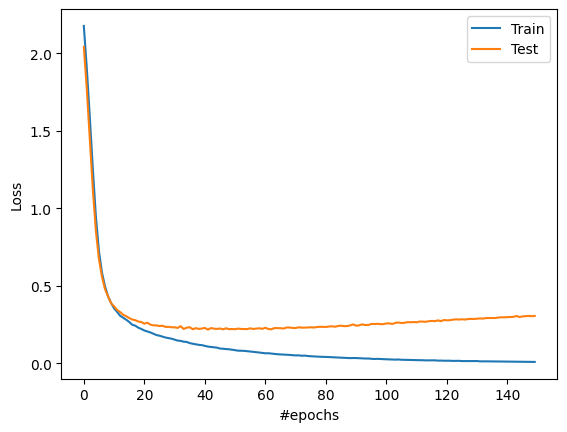

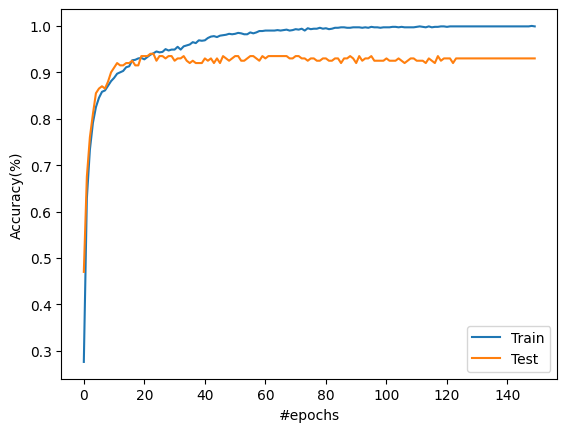

In [5]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شبکه با Dropout</div>



In [6]:
# 1. Import libraries and modules
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train, y_train_original, x_test, y_test_original = load_hoda()

# 3. Preprocess input data
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(60, activation='relu', input_dim=25))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
          epochs=150,
          batch_size=128, validation_data=(x_test, y_test))


Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.1305 - loss: 2.2501 - val_accuracy: 0.4250 - val_loss: 2.0994
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3168 - loss: 2.0682 - val_accuracy: 0.6450 - val_loss: 1.9180
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4528 - loss: 1.9128 - val_accuracy: 0.7300 - val_loss: 1.6907
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5888 - loss: 1.6768 - val_accuracy: 0.7900 - val_loss: 1.4320
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6110 - loss: 1.4437 - val_accuracy: 0.8300 - val_loss: 1.1661
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6987 - loss: 1.2135 - val_accuracy: 0.8450 - val_loss: 0.9316
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7185 - loss: 1.0488 - val_accuracy: 0.8600 - val_loss: 0.7651
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7495 - loss: 0.8921 - val_accuracy: 0.8650 - val_loss: 0

Test Accuracy: 0.949999988079071 
Maximum Test Acuracy During Training:  0.9599999785423279


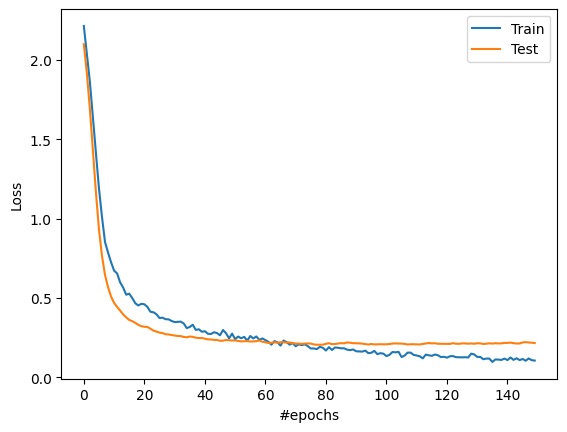

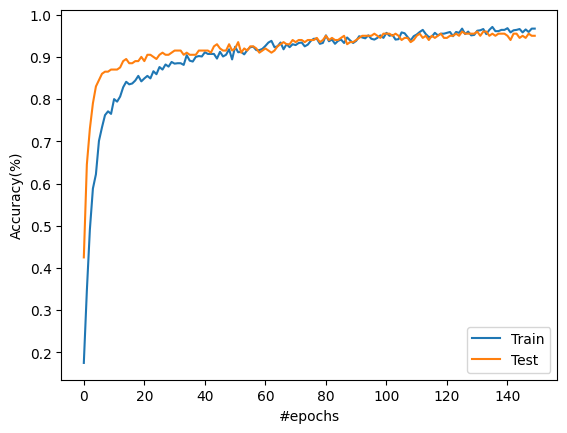

In [7]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()